In [ ]:
"""torch.backends.mps.is_available()"""

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def cpu():
    return torch.device("cpu")

def gpu():
    return torch.device("mps")

cpu(), gpu()

(device(type='cpu'), device(type='mps'))

In [4]:
def try_gpu():
    if torch.backends.mps.is_available():
        return gpu()
    else:
        return cpu()
    
try_gpu()

device(type='mps')

In [5]:
x = torch.tensor([1, 2, 3])
x.device

device(type='cpu')

In [6]:
y = torch.tensor([1,2, 3], device=try_gpu())
y.device

device(type='mps', index=0)

In [7]:
net = nn.Sequential(
    nn.LazyLinear(1)
)

net = net.to(device=try_gpu())

In [9]:
X = torch.rand((20, 3), device=try_gpu())
net(X)

tensor([[ 0.4640],
        [-0.0773],
        [ 0.1566],
        [ 0.4712],
        [ 0.4344],
        [ 0.4321],
        [ 0.3258],
        [ 0.6016],
        [ 0.4272],
        [ 0.5339],
        [ 0.5270],
        [ 0.4847],
        [ 0.6310],
        [ 0.5441],
        [ 0.4447],
        [ 0.6595],
        [ 0.3737],
        [ 0.3777],
        [ 0.2183],
        [ 0.3436]], device='mps:0', grad_fn=<LinearBackward0>)

In [10]:
net.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4929, -0.3963,  0.3772]], device='mps:0')),
             ('0.bias', tensor([0.0768], device='mps:0'))])

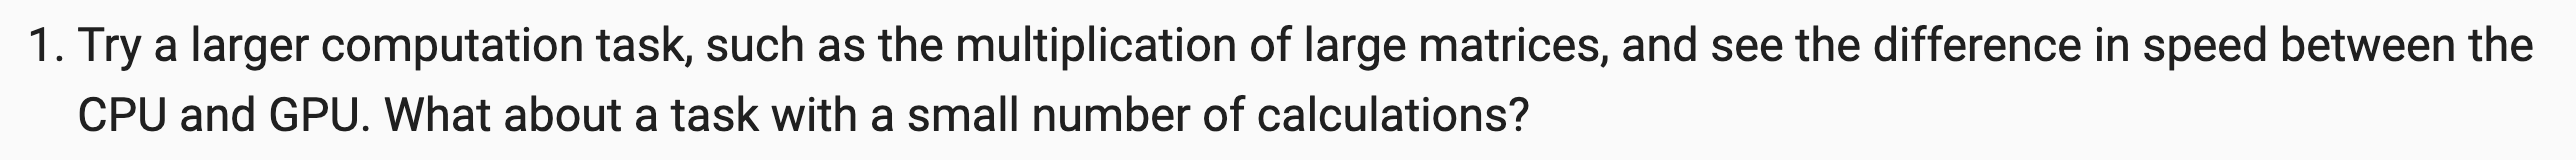

In [15]:
#lets test on a small numbers

X = torch.tensor(3)
Y = torch.tensor(5)

X.device, Y.device

(device(type='cpu'), device(type='cpu'))

In [16]:
%%time

X * Y

CPU times: user 799 μs, sys: 1.62 ms, total: 2.42 ms
Wall time: 1.62 ms


tensor(15)

In [17]:
X = torch.tensor(3, device=try_gpu())
Y = torch.tensor(5, device=try_gpu())

X.device, Y.device

(device(type='mps', index=0), device(type='mps', index=0))

In [18]:
%%time

X * Y

CPU times: user 927 μs, sys: 1.51 ms, total: 2.43 ms
Wall time: 4.47 ms


tensor(15, device='mps:0')

In [22]:
%%time
# now lets try to use a large matrices

X = torch.randn((10000, 10000))
Y = torch.randn((10000, 10000))

X @ Y

CPU times: user 4.11 s, sys: 211 ms, total: 4.32 s
Wall time: 3.25 s


tensor([[  87.2898, -147.3378, -201.9103,  ...,  111.1057,   89.3343,
          -56.2148],
        [  26.7896,   63.8814,  -38.1199,  ..., -121.7815,  -28.5260,
         -116.3358],
        [ 195.2494,   99.1651,  -61.9044,  ...,  146.7535,   92.4332,
          -10.8831],
        ...,
        [  59.8569,   32.0770,  -37.7893,  ...,  -31.7950,   23.4623,
            1.5343],
        [-153.4775,  -13.6780,  -46.4686,  ...,  -74.4486,   -6.8663,
          -18.5483],
        [  98.2714,   13.7714,   -9.1382,  ...,   80.1154,  124.2608,
         -154.4874]])

In [23]:
%%time
# now lets try to use a large matrices

X = torch.randn((10000, 10000), device=try_gpu())
Y = torch.randn((10000, 10000), device=try_gpu())

X @ Y

CPU times: user 10.5 ms, sys: 82.3 ms, total: 92.8 ms
Wall time: 146 ms


tensor([[  86.8755,   60.8753,  -84.6534,  ...,   10.1616,  107.3806,
           94.9733],
        [-165.2210,   36.7992,   22.3984,  ...,   86.5091,  -46.0659,
         -168.4256],
        [  34.0198,  160.6362,  144.1090,  ...,   32.8071,  205.4024,
          103.6496],
        ...,
        [ -37.3970,  143.9082,    9.1077,  ...,   -2.7676, -121.6766,
           37.3226],
        [ -18.2975,   -0.8559,  128.0994,  ...,   79.2111,   22.0899,
           17.8404],
        [  74.7165,  -12.2421,  -32.7074,  ...,   34.4343,  -21.8904,
          -18.2394]], device='mps:0')

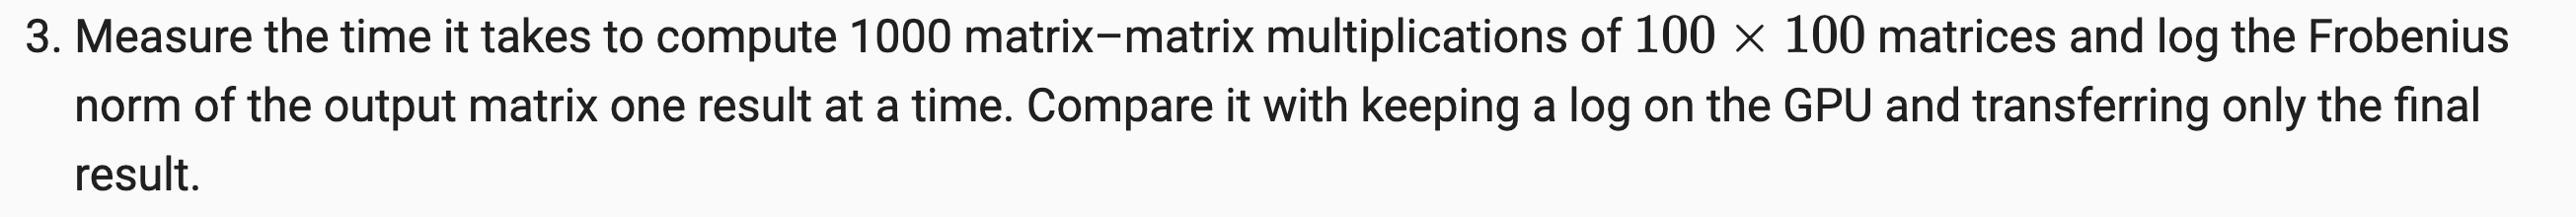

In [ ]:
%%time
#CPU

X = torch.randn((100, 100))

for i in range(100):
    result = torch.linalg.norm(X @ X)
    print(f"{i}: {result}")


0: 1004.5126342773438
1: 1004.5126342773438
2: 1004.5126342773438
3: 1004.5126342773438
4: 1004.5126342773438
5: 1004.5126342773438
6: 1004.5126342773438
7: 1004.5126342773438
8: 1004.5126342773438
9: 1004.5126342773438
10: 1004.5126342773438
11: 1004.5126342773438
12: 1004.5126342773438
13: 1004.5126342773438
14: 1004.5126342773438
15: 1004.5126342773438
16: 1004.5126342773438
17: 1004.5126342773438
18: 1004.5126342773438
19: 1004.5126342773438
20: 1004.5126342773438
21: 1004.5126342773438
22: 1004.5126342773438
23: 1004.5126342773438
24: 1004.5126342773438
25: 1004.5126342773438
26: 1004.5126342773438
27: 1004.5126342773438
28: 1004.5126342773438
29: 1004.5126342773438
30: 1004.5126342773438
31: 1004.5126342773438
32: 1004.5126342773438
33: 1004.5126342773438
34: 1004.5126342773438
35: 1004.5126342773438
36: 1004.5126342773438
37: 1004.5126342773438
38: 1004.5126342773438
39: 1004.5126342773438
40: 1004.5126342773438
41: 1004.5126342773438
42: 1004.5126342773438
43: 1004.512634277343

In [27]:
%%time
#GPU

X = torch.randn((100, 100), device=try_gpu())

for i in range(100):
    result = torch.linalg.norm(X @ X)
    print(f"{i}: {result}")


0: 1007.167236328125
1: 1007.167236328125
2: 1007.167236328125
3: 1007.167236328125
4: 1007.167236328125
5: 1007.167236328125
6: 1007.167236328125
7: 1007.167236328125
8: 1007.167236328125
9: 1007.167236328125
10: 1007.167236328125
11: 1007.167236328125
12: 1007.167236328125
13: 1007.167236328125
14: 1007.167236328125
15: 1007.167236328125
16: 1007.167236328125
17: 1007.167236328125
18: 1007.167236328125
19: 1007.167236328125
20: 1007.167236328125
21: 1007.167236328125
22: 1007.167236328125
23: 1007.167236328125
24: 1007.167236328125
25: 1007.167236328125
26: 1007.167236328125
27: 1007.167236328125
28: 1007.167236328125
29: 1007.167236328125
30: 1007.167236328125
31: 1007.167236328125
32: 1007.167236328125
33: 1007.167236328125
34: 1007.167236328125
35: 1007.167236328125
36: 1007.167236328125
37: 1007.167236328125
38: 1007.167236328125
39: 1007.167236328125
40: 1007.167236328125
41: 1007.167236328125
42: 1007.167236328125
43: 1007.167236328125
44: 1007.167236328125
45: 1007.16723632812

In [30]:
%%time
#CPU

X = torch.randn((10000, 10000))

for i in range(10):
    result = torch.linalg.norm(X @ X)
    print(f"{i}: {result}")


0: 973204.375
1: 973204.375
2: 973204.375
3: 973204.375
4: 973204.375
5: 973204.375
6: 973204.375
7: 973204.375
8: 973204.375
9: 973204.375
CPU times: user 22.3 s, sys: 690 ms, total: 22.9 s
Wall time: 12.4 s


In [31]:
%%time
#GPU

X = torch.randn((10000, 10000), device=try_gpu())

for i in range(10):
    result = torch.linalg.norm(X @ X)
    print(f"{i}: {result}")


0: 1000103.8125
1: 1000103.8125
2: 1000103.8125
3: 1000103.8125
4: 1000103.8125
5: 1000103.8125
6: 1000103.8125
7: 1000103.8125
8: 1000103.8125
9: 1000103.8125
CPU times: user 15.3 ms, sys: 223 ms, total: 238 ms
Wall time: 8.47 s
